<a href="https://colab.research.google.com/github/ALYAMBR/Notebooks/blob/master/CFT_test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка файлов

Загрузим архив с данными с гуглдрайва и распакуем.

In [1]:
!cp /content/drive/MyDrive/Datasets/hw_cft.zip /content/hw_cft.zip

In [2]:
!unzip /content/hw_cft.zip

Archive:  /content/hw_cft.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: Variable_Definitions.csv  


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output 

Загрузим данные в память и посмотрим, что там есть.

In [4]:
var_defs = pd.read_csv("/content/Variable_Definitions.csv")

In [5]:
test_set = pd.read_csv("/content/test.csv")

In [6]:
train_set = pd.read_csv("/content/train.csv")

In [7]:
full_set = pd.concat([train_set, test_set])

In [8]:
full_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95662 entries, 0 to 15771
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  int64  
 1   BatchId               95662 non-null  int64  
 2   AccountId             95662 non-null  int64  
 3   SubscriptionId        95662 non-null  int64  
 4   CustomerId            95662 non-null  int64  
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  int64  
 8   ProductId             95662 non-null  int64  
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  int64  
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

#Изучение данных

In [9]:
var_defs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  18 non-null     object
 1   Definition   18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


In [10]:
for key in var_defs.index:
    print(var_defs['Column Name'][key], "\t\t\t", var_defs.Definition[key])

TransactionId 			 Уникальный идентификатор транзакции на платформе
BatchId 			 Уникальное идентификатор присваевыемый пакету транзакций для обработки
AccountId 			 Уникальный идентификатор пользователя на платформе
SubscriptionId 			 Уникальный идентификатор идентифицирующий подписку клиента
CustomerId 			 Уникальный идентификатор привязанный к аккаунту
CurrencyCode 			 Валюта страны
CountryCode 			 Цифровой географический код страны
ProviderId 			 Поставщик товара
ProductId 			 Идентификатор купленного товара
ProductCategory 			 Категория товара
ChannelId 			 Тип канала по которому прошел платеж web/android/ios/pay later/checkout
Amount 			 Стоимость сделки. Положительный говорит о списании/отрицательный о зачислении
Value 			 Абсолютное значение суммы
TransactionStartTime 			 Время начала транзакции
PricingStrategy 			 Категория ценовой структуры
FraudResult 			 Фродовый статус транзакции
ClientProfile 			 Тип профиля клиента по мнения платформы
TrasactionCategory 			 Рисковость тран

Тут описание переменных. Фродовый статус транзакции это целевая переменная. Так как не ясна природа фич PricingStrategy, ClientProfile, TrasactionCategory, то непонятно, имеет ли смысл абсолютное значение каждой из этих фич. Поэтому преобразуем их к one-hot.

In [11]:
train_set

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,ClientProfile,TrasactionCategory
0,76871,36123,3957,887,4406,EUR,49,6,10,airtime,3,1000.0,1000,2018-11-15 02:18:49,2,0,4,3
1,73770,15642,4841,3829,4406,EUR,49,4,6,financial_services,2,-20.0,20,2018-11-15 02:19:08,2,0,0,2
2,26203,53941,4229,222,4683,EUR,49,6,1,airtime,3,500.0,500,2018-11-15 02:44:21,2,0,3,2
3,380,102363,648,2185,988,EUR,49,1,21,utility_bill,3,20000.0,21800,2018-11-15 03:32:55,2,0,3,1
4,28195,38780,4841,3829,988,EUR,49,4,6,financial_services,2,-644.0,644,2018-11-15 03:34:21,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79885,18019,129395,4841,3829,3795,EUR,49,4,6,financial_services,2,-5000.0,5000,2019-01-31 23:08:18,2,0,0,1
79886,102758,87434,2577,3326,2994,EUR,49,5,1,airtime,3,1000.0,1000,2019-01-31 23:44:44,4,0,3,1
79887,10757,114753,4841,3829,2994,EUR,49,4,6,financial_services,2,-50.0,50,2019-01-31 23:45:42,2,0,0,2
79888,104292,100831,2669,2002,3088,EUR,49,5,15,financial_services,3,45000.0,45000,2019-01-31 23:51:33,2,0,2,3


In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79890 entries, 0 to 79889
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         79890 non-null  int64  
 1   BatchId               79890 non-null  int64  
 2   AccountId             79890 non-null  int64  
 3   SubscriptionId        79890 non-null  int64  
 4   CustomerId            79890 non-null  int64  
 5   CurrencyCode          79890 non-null  object 
 6   CountryCode           79890 non-null  int64  
 7   ProviderId            79890 non-null  int64  
 8   ProductId             79890 non-null  int64  
 9   ProductCategory       79890 non-null  object 
 10  ChannelId             79890 non-null  int64  
 11  Amount                79890 non-null  float64
 12  Value                 79890 non-null  int64  
 13  TransactionStartTime  79890 non-null  object 
 14  PricingStrategy       79890 non-null  int64  
 15  FraudResult        

Поизучаем данные. Затем напишем функцию, которая будет готовить данные к рабочему виду.

##AccountId

In [13]:
train_set.AccountId.value_counts()

4841    25864
4249     4441
4840     1440
3206     1105
318      1004
        ...  
3889        1
1041        1
3953        1
4081        1
2049        1
Name: AccountId, Length: 3219, dtype: int64

In [14]:
accs = train_set.AccountId.value_counts()
AccountsActive10000 = pd.Series(accs[accs >= 10000], name = 'AccountsActive10000')
AccountsActive1000 = pd.Series(accs[(accs >= 1000) & (accs < 10000)], name = 'AccountsActive1000')
AccountsActive100 = pd.Series(accs[(accs >= 100) & (accs < 1000)], name = 'AccountsActive100')
AccountsActive10 = pd.Series(accs[(accs >= 10) & (accs < 100)], name = 'AccountsActive10')
AccountsActive1 = pd.Series(accs[(accs >= 1) & (accs < 10)], name = 'AccountsActive1')

Думаю, стоит сделать несколько наборов аккаунтов по степени их активности.

##CurrencyCode

In [15]:
train_set.CurrencyCode.unique()

array(['EUR'], dtype=object)

In [16]:
test_set.CurrencyCode.unique()

array(['EUR'], dtype=object)

Видим, что данный атрибут окажется при обучении абсолютно бесполезным, так как это константа. Поэтому просто удалим его.

##ProductCategory

In [17]:
train_set.ProductCategory.unique()

array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
       'tv', 'transport', 'ticket', 'movies', 'other'], dtype=object)

In [18]:
test_set.ProductCategory.unique()

array(['tv', 'financial_services', 'airtime', 'data_bundles',
       'utility_bill', 'ticket', 'transport', 'movies'], dtype=object)

In [19]:
train_set.ProductCategory.value_counts()

airtime               37715
financial_services    37590
utility_bill           1575
data_bundles           1563
tv                     1048
ticket                  206
movies                  168
transport                23
other                     2
Name: ProductCategory, dtype: int64

Тут всё хорошо. Во-первых, значения различные, во-вторых, в тренировочных данных есть все категории, которые есть в тестовом, что избавит от проблем неизвестных категорий. Сделаем one-hot кодирование.

##TransactionStartTime

In [20]:
trans_start_time = train_set.TransactionStartTime

In [21]:
trans_start_time

0        2018-11-15 02:18:49
1        2018-11-15 02:19:08
2        2018-11-15 02:44:21
3        2018-11-15 03:32:55
4        2018-11-15 03:34:21
                ...         
79885    2019-01-31 23:08:18
79886    2019-01-31 23:44:44
79887    2019-01-31 23:45:42
79888    2019-01-31 23:51:33
79889    2019-01-31 23:54:12
Name: TransactionStartTime, Length: 79890, dtype: object

Даты как минимум можно конвертировать в числа. Также можно сгенерировать фичи вроде секунд, времени суток. Возможно, это как-то поможет. Хотя без знания предметной области кажется, что время начала транзакции никак не влияет на её фрод статус.

## CountryCode

In [22]:
train_set.CountryCode.unique()

array([49])

In [23]:
test_set.CountryCode.unique()

array([49])

Просто удаляем, так как никакой информации этот признак не несёт.

##Amount

Можно сгенерировать фичу - дробная составляющая суммы. Так как есть небольшое количество транзакций, в которых сумма не круглое число. И это подозрительно, так как почти все транзакции имеют круглую сумму.

In [24]:
(full_set.Amount - full_set.Amount.astype(int)).value_counts()

 0.00    95334
-0.50      147
-0.25       19
-0.75       12
-0.20       10
         ...  
-0.08        1
-0.45        1
-0.45        1
-0.28        1
-0.20        1
Name: Amount, Length: 82, dtype: int64

## ProviderId

In [25]:
full_set.ProviderId.unique()

array([6, 4, 1, 5, 3, 2])

In [26]:
full_set.ProviderId.value_counts()

4    38189
6    34186
5    14542
1     5643
3     3084
2       18
Name: ProviderId, dtype: int64

Среди мошеннических часто попадаются 1, 3 и 5.

## PricingStrategy

In [27]:
full_set.PricingStrategy.unique()

array([2, 4, 1, 0])

In [28]:
full_set.PricingStrategy.value_counts()

2    79848
4    13562
1     1867
0      385
Name: PricingStrategy, dtype: int64

Довольно много фрод транзакций с PricingStrategy равным 0. А это редкая стратегия.

## ChannelId

In [29]:
full_set.ChannelId.unique()

array([3, 2, 1, 5])

In [30]:
full_set.ChannelId.value_counts()

3    56935
2    37141
5     1048
1      538
Name: ChannelId, dtype: int64

3 канал самый частый, поэтому ничего удивительного, что почти все фрод транзакции идут по нему.

##ClientProfile

In [31]:
full_set.ClientProfile.unique()

array([4, 0, 3, 1, 2])

In [32]:
train_set.ClientProfile.value_counts()

0    35743
2    13202
3    12229
1     9953
4     8763
Name: ClientProfile, dtype: int64

##TrasactionCategory

In [33]:
train_set.TrasactionCategory.unique()

array([3, 2, 1])

In [34]:
test_set.TrasactionCategory.unique()

array([1, 3, 2])

In [35]:
train_set.TrasactionCategory.value_counts()

1    26654
3    26644
2    26592
Name: TrasactionCategory, dtype: int64

Судя по всему, рисковость транзакции по мнению внешней системы никак не коррелирует с её фрод статусом.

##ProductId

In [36]:
full_set.ProductId.unique()

array([10,  6,  1, 21,  3, 15, 11, 19,  4,  5, 20,  9, 24, 14,  2, 13, 22,
        8,  7, 27, 12, 16, 23])

In [37]:
full_set.ProductId.value_counts()

6     32635
3     24344
10    15384
15    11964
1      2885
4      2403
21     1512
11     1377
19      965
14      789
13      296
2       236
20      216
8       197
24      175
22      112
7        86
27       31
5        25
9        17
16       10
12        2
23        1
Name: ProductId, dtype: int64

##SubscriptionId

In [38]:
len(full_set.SubscriptionId.unique())

3627

##CustomerId

In [39]:
len(full_set.CustomerId.unique())

3742

#Функция препроцессинга

Напишем функцию, в которой к входному датасету будут применяться всякие преобразования.

In [40]:
product_dummies = pd.get_dummies(full_set.ProductCategory)

In [645]:
def prepare_data(data):
    accs = data.AccountId.value_counts()
    # разделение аккаунтов по активности (количеству транзакций)
    AccountsActive10000 = pd.Series(accs[accs >= 10000], name = 'AccountsActive10000')
    AccountsActive1000 = pd.Series(accs[(accs >= 1000) & (accs < 10000)], name = 'AccountsActive1000')
    AccountsActive100 = pd.Series(accs[(accs >= 100) & (accs < 1000)], name = 'AccountsActive100')
    AccountsActive10 = pd.Series(accs[(accs >= 10) & (accs < 100)], name = 'AccountsActive10')
    AccountsActive1 = pd.Series(accs[(accs >= 1) & (accs < 10)], name = 'AccountsActive1')
    data["AccountsActive10000"] = data.AccountId.isin(AccountsActive10000.index).astype(int)
    data["AccountsActive1000"] = data.AccountId.isin(AccountsActive1000.index).astype(int)
    data["AccountsActive100"] = data.AccountId.isin(AccountsActive100.index).astype(int)
    data["AccountsActive10"] = data.AccountId.isin(AccountsActive10.index).astype(int)
    data["AccountsActive1"] = data.AccountId.isin(AccountsActive1.index).astype(int)
    # one-hot ProductCategory
    prod_cat_dum = pd.get_dummies(data.ProductCategory, prefix="prodcat")
    data = pd.concat([data, prod_cat_dum], axis=1)
    # one_hot ChannelId
    chan_dum = pd.get_dummies(data.ChannelId, prefix="chan")
    data = pd.concat([data, chan_dum], axis=1)
    #one_hot PricingStrategy 
    pricestrat_dum = pd.get_dummies(data.PricingStrategy, prefix="pricestrat")
    data = pd.concat([data, pricestrat_dum], axis=1)
    #one_hot ProviderId
    provid_dum = pd.get_dummies(data.ProviderId, prefix="provid")
    data = pd.concat([data, provid_dum], axis=1)
    #one_hot ClientProfile
    clprof_dum = pd.get_dummies(data.ClientProfile, prefix="clprof")
    data = pd.concat([data, clprof_dum], axis=1)
    #one_hot TrasactionCategory 
    trcat_dum = pd.get_dummies(data.TrasactionCategory, prefix="trcat")
    data = pd.concat([data, trcat_dum], axis=1)
    #one-hot ProductId
    prod_dum = pd.get_dummies(data.ProductId, prefix="prod")
    data = pd.concat([data, prod_dum], axis=1)
    # удаление лишних атрибутов
    data = data.drop(labels=["CurrencyCode",
                             "CountryCode",
                             "TransactionId",
                             "BatchId",
                             "ProductCategory",
                             "ChannelId",
                             "PricingStrategy",
                             "ProviderId",
                             "ClientProfile",
                             "TrasactionCategory",
                             "ProductId",
                             "SubscriptionId",
                             "CustomerId"], axis=1)
    return data

#FraudResult и корреляции

In [42]:
train_set = prepare_data(train_set)

In [43]:
train_set.head()

,AccountId,Amount,Value,TransactionStartTime,FraudResult,AccountsActive10000,AccountsActive1000,AccountsActive100,AccountsActive10,AccountsActive1,prodcat_airtime,prodcat_data_bundles,prodcat_financial_services,prodcat_movies,prodcat_other,prodcat_ticket,prodcat_transport,prodcat_tv,prodcat_utility_bill,chan_1,chan_2,chan_3,chan_5,pricestrat_0,pricestrat_1,pricestrat_2,pricestrat_4,provid_1,provid_2,provid_3,provid_4,provid_5,provid_6,clprof_0,clprof_1,clprof_2,clprof_3,clprof_4,trcat_1,trcat_2,trcat_3,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_27
0,3957,1000.0,1000,2018-11-15 02:18:49,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4841,-20.0,20,2018-11-15 02:19:08,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4229,500.0,500,2018-11-15 02:44:21,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,648,20000.0,21800,2018-11-15 03:32:55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4841,-644.0,644,2018-11-15 03:34:21,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
train_set.FraudResult.value_counts()

0    79750
1      140
Name: FraudResult, dtype: int64

Тут всё как-то печально, на 80 тысяч записей всего 140 мошеннических.

In [45]:
fraud_subset = train_set[train_set.FraudResult == 1]
fraud_subset.head(60)

,AccountId,Amount,Value,TransactionStartTime,FraudResult,AccountsActive10000,AccountsActive1000,AccountsActive100,AccountsActive10,AccountsActive1,prodcat_airtime,prodcat_data_bundles,prodcat_financial_services,prodcat_movies,prodcat_other,prodcat_ticket,prodcat_transport,prodcat_tv,prodcat_utility_bill,chan_1,chan_2,chan_3,chan_5,pricestrat_0,pricestrat_1,pricestrat_2,pricestrat_4,provid_1,provid_2,provid_3,provid_4,provid_5,provid_6,clprof_0,clprof_1,clprof_2,clprof_3,clprof_4,trcat_1,trcat_2,trcat_3,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_27
131,3832,700000.0,700000,2018-11-15 08:04:51,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
146,2366,725000.0,725000,2018-11-15 08:20:09,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
155,3832,700000.0,700000,2018-11-15 08:31:57,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2376,3692,700000.0,700000,2018-11-17 09:15:23,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2452,3832,700000.0,700000,2018-11-17 11:49:46,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3778,2366,905000.0,905000,2018-11-19 12:10:31,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4500,1959,800000.0,800000,2018-11-20 12:00:29,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4508,4003,770000.0,770000,2018-11-20 12:27:15,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4755,3943,500000.0,500000,2018-11-20 22:11:53,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4911,4590,500000.0,500000,2018-11-21 08:26:49,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
fraud_subset.tail(60)

,AccountId,Amount,Value,TransactionStartTime,FraudResult,AccountsActive10000,AccountsActive1000,AccountsActive100,AccountsActive10,AccountsActive1,prodcat_airtime,prodcat_data_bundles,prodcat_financial_services,prodcat_movies,prodcat_other,prodcat_ticket,prodcat_transport,prodcat_tv,prodcat_utility_bill,chan_1,chan_2,chan_3,chan_5,pricestrat_0,pricestrat_1,pricestrat_2,pricestrat_4,provid_1,provid_2,provid_3,provid_4,provid_5,provid_6,clprof_0,clprof_1,clprof_2,clprof_3,clprof_4,trcat_1,trcat_2,trcat_3,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_27
53492,3519,2000000.0,2000000,2019-01-08 10:58:06,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
54718,4590,500000.0,500000,2019-01-08 13:56:32,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55664,2461,500000.0,500000,2019-01-10 11:29:42,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
55689,953,5000000.0,5000000,2019-01-10 12:08:22,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
55697,953,520000.0,520000,2019-01-10 12:38:57,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55728,1605,540000.0,540000,2019-01-10 13:39:14,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
55822,4249,-900000.0,900000,2019-01-10 15:48:59,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55841,4249,-500000.0,500000,2019-01-10 16:03:35,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
55920,4465,500000.0,500000,2019-01-10 17:48:04,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
55924,4465,5000000.0,5000000,2019-01-10 17:53:21,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [47]:
fraud_subset.TrasactionCategory.value_counts()

AttributeError: ignored

In [ ]:
fraud_corrs = train_set.corr()

In [ ]:
plt.figure(figsize=(20, 16))
hmap = sns.heatmap(fraud_corrs, annot=True)
plt.show(hmap)

Сразу бросается в глаза то, что многие мошеннические транзакции сделаны:

1.   С одного и того же аккаунта
2.   В категории "financial_services"
3.   На огромные круглые (целые, без дробной части) положительные суммы. (возможно, это потому что мошеннические транзакции на малые суммы не так интересно и не так просто детектировать и их просто не заметили)
4.   По каналу с айди равным 3.
5.   Продукт айди равен 15.
6.   SubscriptionId тоже часто одинаковый. Скорее всего он очень сильно коррелирует с айди аккаунта.
7.   Время транзакции не коррелирует с фрод статусом.

# Создание своих фич

## Количество транзакций, денег и средняя сумма в час с одного аккаунта

Есть идея создать фичу, основанную на сумме и количестве транзакций за какой-то период времени. В основе гипотеза, что мошенники делают несколько транзакций на большие суммы в короткий срок.
Для расчёта нужно взять все записи для одного аккаунта за последний день/час/десять минут, проссумировать деньги и умножить всё это на количество транзакций, чтобы увеличить подозрение при росте количества транзакций. В перспективе попробовать варьировать период.

In [665]:
def make_tran_speed_feature(dataset, period=np.timedelta64(1, 'h'), logs=False):
    dataset = dataset.sort_values("TransactionStartTime", axis=0)
    dataset.TransactionStartTime = pd.to_datetime(dataset.TransactionStartTime).map(lambda x: x.to_numpy())
    dataset["trans_speed"] = pd.Series(0)
    dataset["trans_in_hour"] = pd.Series(0)
    dataset["value_in_hour"] = pd.Series(0)
    dataset["avrg_trans_in_hour"] = pd.Series(0)
    set_len = len(dataset)
    for i, row in dataset.iterrows():
        acc_id = row.AccountId
        sum = row.Value
        trans_num = 1
        cur_time = row.TransactionStartTime
        j = i - 1
        while True:
            if j >= 0:
                past_row = dataset.iloc[j]
                delta = cur_time - past_row.TransactionStartTime
                if delta > period:
                    break
                if past_row.AccountId == acc_id:
                    sum += past_row.Value
                    trans_num += 1
                j = j - 1
            else:
                break

        j = i + 1
        while True:
            if j < set_len:
                future_row = dataset.iloc[j]
                if future_row.TransactionStartTime - cur_time > period:
                    break
                if future_row.AccountId == acc_id:
                    sum += future_row.Value
                    trans_num += 1
                j += 1
            else:
                break

        trans_speed_val = sum * trans_num / 1000000
        dataset.trans_speed[i] = trans_speed_val
        dataset.trans_in_hour[i] = sum
        dataset.value_in_hour[i] = trans_num
        dataset.avrg_trans_in_hour[i] = sum / trans_num
        if logs:
            if i % 10 == 0:
                clear_output()
            print(i, "\n\tSpeed: \t", trans_speed_val,
                     "\n\tVal in hour: \t", sum,
                     "\n\tTrans num: \t", trans_num,
                     "\n\tAverage: \t", sum / trans_num)
    return dataset

In [53]:
train_set = pd.read_csv("/content/train.csv")

In [54]:
train_set = prepare_data(train_set)

In [55]:
train_set = make_tran_speed_feature(train_set, logs=True)

300 
	Speed: 	 0.0012 
	Val in hour: 	 1200 
	Trans num: 	 1 
	Average: 	 1200.0
301 
	Speed: 	 0.03654 
	Val in hour: 	 1740 
	Trans num: 	 21 
	Average: 	 82.85714285714286
302 
	Speed: 	 0.004 
	Val in hour: 	 2000 
	Trans num: 	 2 
	Average: 	 1000.0
303 
	Speed: 	 0.03116 
	Val in hour: 	 1640 
	Trans num: 	 19 
	Average: 	 86.3157894736842
304 
	Speed: 	 0.03759 
	Val in hour: 	 1790 
	Trans num: 	 21 
	Average: 	 85.23809523809524
305 
	Speed: 	 0.0035 
	Val in hour: 	 3500 
	Trans num: 	 1 
	Average: 	 3500.0
306 
	Speed: 	 0.04048 
	Val in hour: 	 1840 
	Trans num: 	 22 
	Average: 	 83.63636363636364
307 
	Speed: 	 0.03 
	Val in hour: 	 15000 
	Trans num: 	 2 
	Average: 	 7500.0
308 
	Speed: 	 0.02709 
	Val in hour: 	 1290 
	Trans num: 	 21 
	Average: 	 61.42857142857143
309 
	Speed: 	 0.002 
	Val in hour: 	 1000 
	Trans num: 	 2 
	Average: 	 500.0
310 
	Speed: 	 0.002 
	Val in hour: 	 1000 
	Trans num: 	 2 
	Average: 	 500.0
311 
	Speed: 	 0.005 
	Val in hour: 	 5000 
	Trans 

KeyboardInterrupt: ignored

In [ ]:
# train_set.to_csv("/content/drive/MyDrive/Datasets/cft_set_tran_speed.csv")

In [654]:
train_set = pd.read_csv("/content/drive/MyDrive/Datasets/cft_set_tran_speed.csv")

In [655]:
train_set = train_set.drop(["Unnamed: 0", "AccountId", "TransactionStartTime"], axis=1)

In [656]:
train_set

,Amount,Value,FraudResult,AccountsActive10000,AccountsActive1000,AccountsActive100,AccountsActive10,AccountsActive1,prodcat_airtime,prodcat_data_bundles,prodcat_financial_services,prodcat_movies,prodcat_other,prodcat_ticket,prodcat_transport,prodcat_tv,prodcat_utility_bill,chan_1,chan_2,chan_3,chan_5,pricestrat_0,pricestrat_1,pricestrat_2,pricestrat_4,provid_1,provid_2,provid_3,provid_4,provid_5,provid_6,clprof_0,clprof_1,clprof_2,clprof_3,clprof_4,trcat_1,trcat_2,trcat_3,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_27,trans_speed,trans_in_hour,value_in_hour,avrg_trans_in_hour
0,1000.0,1000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001000,1000.0,1.0,1000.000000
1,-20.0,20,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000020,20.0,1.0,20.000000
2,500.0,500,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000500,500.0,1.0,500.000000
3,20000.0,21800,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.021800,21800.0,1.0,21800.000000
4,-644.0,644,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003552,1184.0,3.0,394.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79885,-5000.0,5000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.209316,17443.0,12.0,1453.583333
79886,1000.0,1000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001000,1000.0,1.0,1000.000000
79887,-50.0,50,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.010100,5050.0,2.0,2525.000000
79888,45000.0,45000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.045000,45000.0,1.0,45000.000000


In [657]:
fraud_corrs = train_set.corr()

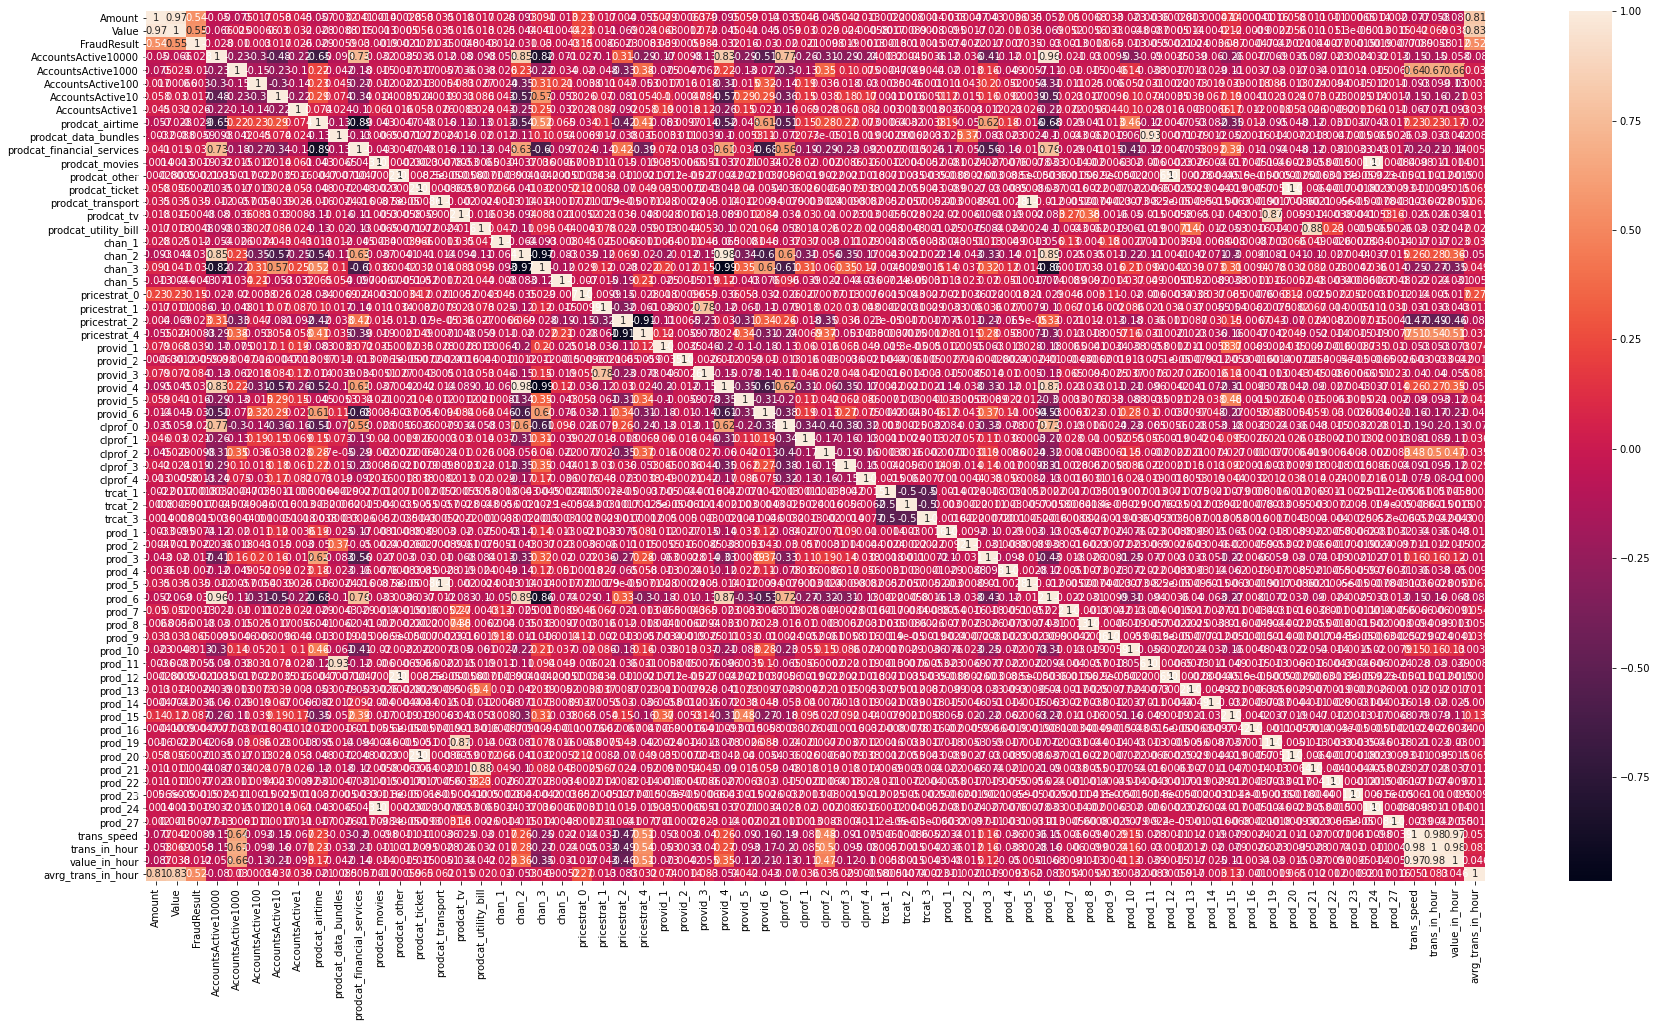

In [658]:
plt.figure(figsize=(30, 16))
hmap = sns.heatmap(fraud_corrs, annot=True)
plt.show(hmap)

#Предсказание

## Разбиение обучающей выборки

In [659]:
from sklearn import preprocessing

Разобьём на X и Y для удобства.

In [660]:
train_Y = train_set.FraudResult

In [661]:
train_X = train_set.drop(labels=["FraudResult"], axis=1)

In [662]:
scaler = preprocessing.StandardScaler().fit(train_X)

In [386]:
train_X = scaler.transform(train_X)

Разобьём на train, valid, test в отношении 3:1:1 .

In [387]:
SEED = 37

In [388]:
from sklearn.model_selection import train_test_split

In [389]:
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y,
                                                    test_size=0.4,
                                                    random_state=SEED,
                                                    shuffle=True)

In [390]:
test_X, val_X, test_Y, val_Y = train_test_split(test_X, test_Y,
                                                test_size=0.5,
                                                random_state=SEED,
                                                shuffle=True)

#Модель

In [ ]:
from sklearn.metrics import f1_score

##Градиентный бустинг

In [391]:
from sklearn.ensemble import GradientBoostingClassifier as GBC 

In [392]:
gbc = GBC(n_estimators=1, learning_rate=1.0, max_depth=1, random_state=SEED)

In [393]:
gbc.fit(train_X, train_Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=37, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [394]:
gbc_predict_train = gbc.predict(train_X)

In [395]:
f1_score(train_Y, gbc_predict_train)

0.7126436781609196

In [396]:
gbc_predict_val = pd.Series(gbc.predict(val_X))

In [397]:
f1_score(val_Y, gbc_predict_val)

0.875

In [398]:
val_Y.value_counts()

0    15947
1       31
Name: FraudResult, dtype: int64

In [399]:
gbc_predict_val.value_counts()

0    15945
1       33
dtype: int64

##Дерево решений

In [400]:
from sklearn.tree import DecisionTreeClassifier

In [401]:
dtc = DecisionTreeClassifier(random_state=SEED)

In [402]:
dtc.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=37, splitter='best')

In [403]:
dtc_train_pred = dtc.predict(train_X)

In [404]:
f1_score(train_Y, dtc_train_pred)

0.9933774834437086

In [405]:
dtc_val_pred = dtc.predict(val_X)

In [406]:
f1_score(val_Y, dtc_val_pred)

0.9523809523809523

In [407]:
pd.Series(dtc_val_pred).value_counts()

0    15946
1       32
dtype: int64

In [408]:
importance = dtc.feature_importances_

In [409]:
importance

array([0.08514991, 0.6673215 , 0.        , 0.        , 0.00442207,
       0.00442207, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00850398, 0.        , 0.0066331 , 0.        , 0.        ,
       0.        , 0.08811243, 0.        , 0.        , 0.        ,
       0.0174156 , 0.        , 0.        , 0.        , 0.        ,
       0.01547724, 0.        , 0.00221103, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01005016, 0.        , 0.        ,
       0.        , 0.03763448, 0.00307439, 0.        , 0.04957203])

In [410]:
indices = np.argsort(importance[::-1])

In [411]:
for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

1. feature 32 (0.000000)
2. feature 62 (0.003074)
3. feature 33 (0.000000)
4. feature 35 (0.015477)
5. feature 36 (0.000000)
6. feature 37 (0.002211)
7. feature 61 (0.037634)
8. feature 39 (0.000000)
9. feature 40 (0.000000)
10. feature 41 (0.000000)
11. feature 43 (0.000000)
12. feature 45 (0.000000)
13. feature 31 (0.000000)
14. feature 46 (0.000000)
15. feature 48 (0.000000)
16. feature 49 (0.000000)
17. feature 50 (0.000000)
18. feature 51 (0.000000)
19. feature 52 (0.000000)
20. feature 53 (0.000000)
21. feature 54 (0.000000)
22. feature 55 (0.000000)
23. feature 56 (0.000000)
24. feature 57 (0.010050)
25. feature 58 (0.000000)
26. feature 47 (0.000000)
27. feature 28 (0.000000)
28. feature 30 (0.017416)
29. feature 26 (0.088112)
30. feature 9 (0.000000)
31. feature 10 (0.000000)
32. feature 11 (0.000000)
33. feature 12 (0.000000)
34. feature 13 (0.000000)
35. feature 14 (0.000000)
36. feature 15 (0.000000)
37. feature 5 (0.004422)
38. feature 16 (0.000000)
39. feature 8 (0.000000

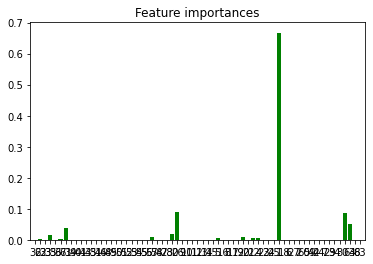

In [412]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importance[indices],
        color="g", align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

##SVM

In [413]:
from sklearn.svm import SVC

In [425]:
svc = SVC(random_state=SEED)

In [426]:
svc.fit(train_X, train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=37, shrinking=True, tol=0.001,
    verbose=False)

In [427]:
svc_train_pred = svc.predict(train_X)

In [428]:
f1_score(train_Y, svc_train_pred)

0.8396946564885496

In [429]:
svc_val_pred = svc.predict(val_X)

In [430]:
f1_score(val_Y, svc_val_pred)

0.4390243902439024

Чего-то так себе

##Random forest

In [431]:
from sklearn.ensemble import RandomForestClassifier

In [577]:
rfc = RandomForestClassifier(n_estimators=24, random_state=SEED)

11 0.9152542372881356

In [578]:
rfc.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [579]:
rfc_train_pred = rfc.predict(train_X)

In [580]:
f1_score(train_Y, rfc_train_pred)

0.9803921568627451

In [581]:
rfc_val_pred = rfc.predict(val_X)

In [582]:
f1_score(val_Y, rfc_val_pred)

0.7777777777777777

##ensemble

In [586]:
from sklearn.ensemble import VotingClassifier

In [587]:
clf1 = GBC(n_estimators=1, learning_rate=1.0, max_depth=1, random_state=SEED)
clf2 = DecisionTreeClassifier(random_state=SEED)
clf3 = SVC(random_state=SEED)

In [588]:
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('drc', clf2), ('svc', clf3)], voting='hard')

In [589]:
eclf1.fit(train_X, train_Y)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=1.0,
                                                         loss='deviance',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                             

In [590]:
eclf1_train_pred = eclf1.predict(train_X)

In [591]:
f1_score(train_Y, eclf1_train_pred)

0.9142857142857143

In [592]:
eclf1_val_pred = eclf1.predict(val_X)

In [593]:
f1_score(val_Y, eclf1_val_pred)

0.9180327868852459

##Попробуем убирать фичи, пока не поймём, что даёт прирост дереву решений (описано в выводах ниже)

In [321]:
from sklearn import preprocessing

In [352]:
train_Y = train_set.FraudResult

In [353]:
train_X = train_set.drop(labels=["FraudResult", "trans_speed", "trans_in_hour", "value_in_hour", "avrg_trans_in_hour", "Amount"], axis=1)

In [354]:
scaler = preprocessing.StandardScaler().fit(train_X)

In [355]:
train_X = scaler.transform(train_X)

In [356]:
SEED = 37

In [357]:
from sklearn.model_selection import train_test_split

In [358]:
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y,
                                                    test_size=0.4,
                                                    random_state=SEED,
                                                    shuffle=True)

In [359]:
test_X, val_X, test_Y, val_Y = train_test_split(test_X, test_Y,
                                                test_size=0.5,
                                                random_state=SEED,
                                                shuffle=True)

In [360]:
from sklearn.ensemble import GradientBoostingClassifier as GBC 
from sklearn.metrics import f1_score

In [369]:
from sklearn.tree import DecisionTreeClassifier

In [370]:
dtc = DecisionTreeClassifier(random_state=SEED)

In [371]:
dtc.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=37, splitter='best')

In [372]:
dtc_train_pred = dtc.predict(train_X)

In [373]:
f1_score(train_Y, dtc_train_pred)

0.9664429530201343

In [374]:
dtc_val_pred = dtc.predict(val_X)

In [375]:
f1_score(val_Y, dtc_val_pred)

0.9032258064516129

In [376]:
pd.Series(dtc_val_pred).value_counts()

0    15947
1       31
dtype: int64

In [377]:
importance = dtc.feature_importances_

In [378]:
importance

array([7.83877511e-01, 1.71609006e-06, 0.00000000e+00, 0.00000000e+00,
       2.37835619e-03, 1.77877553e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.54362550e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.20637650e-03,
       0.00000000e+00, 1.28255060e-02, 0.00000000e+00, 4.50419555e-03,
       0.00000000e+00, 7.23528292e-02, 0.00000000e+00, 5.38886806e-03,
       0.00000000e+00, 2.19426633e-02, 6.18372610e-03, 7.58932252e-03,
       0.00000000e+00, 0.00000000e+00, 3.13445575e-02, 3.92617530e-03,
       9.16107570e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.43540339e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [379]:
indices = np.argsort(importance[::-1])

In [380]:
for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

1. feature 0 (0.783878)
2. feature 47 (0.000000)
3. feature 26 (0.000000)
4. feature 27 (0.005389)
5. feature 53 (0.000000)
6. feature 52 (0.000000)
7. feature 31 (0.007589)
8. feature 33 (0.000000)
9. feature 51 (0.003435)
10. feature 56 (0.007550)
11. feature 35 (0.003926)
12. feature 50 (0.000000)
13. feature 39 (0.000000)
14. feature 41 (0.000000)
15. feature 42 (0.000000)
16. feature 43 (0.000000)
17. feature 49 (0.000000)
18. feature 45 (0.000000)
19. feature 46 (0.000000)
20. feature 37 (0.000000)
21. feature 22 (0.000000)
22. feature 48 (0.000000)
23. feature 20 (0.000000)
24. feature 1 (0.000002)
25. feature 2 (0.000000)
26. feature 57 (0.000000)
27. feature 4 (0.002378)
28. feature 5 (0.017788)
29. feature 6 (0.000000)
30. feature 7 (0.000000)
31. feature 9 (0.000000)
32. feature 21 (0.012826)
33. feature 11 (0.000000)
34. feature 10 (0.000000)
35. feature 13 (0.000000)
36. feature 14 (0.000000)
37. feature 15 (0.006544)
38. feature 16 (0.000000)
39. feature 17 (0.000000)
40.

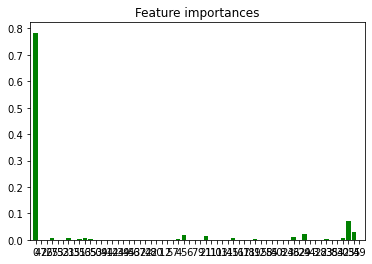

In [381]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importance[indices],
        color="g", align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

## Test

Теперь опробуем модели на тесте и выберем лучшую

In [594]:
gbc_pr = gbc.predict(test_X)

In [595]:
f1_score(test_Y, gbc_pr)

0.8108108108108109

In [596]:
dtc_pr = dtc.predict(test_X)

In [597]:
f1_score(test_Y, dtc_pr)

0.8615384615384615

In [599]:
svc_pr = svc.predict(test_X)

In [600]:
f1_score(test_Y, svc_pr)

0.64

In [601]:
rfc_pr = rfc.predict(test_X)

In [602]:
f1_score(test_Y, rfc_pr)

0.8070175438596493

In [603]:
eclf_pr = eclf1.predict(test_X)

In [604]:
f1_score(test_Y, eclf_pr)

0.8709677419354839

# Выводы

Простое дерево решений даёт отличный результат. При этом самыми важными фичами являются "Value" и "Amount". Удаление новых фич про скорость транзакций уменьшает точность модели, поэтому можно сделать вывод, что они тоже улучшают результат. На тестовой выборке лучше всего показал себя ансамбль из хорошо работающих градиентного бустинга и дерева решений и плохо работающей машины векторов. Будем использовать его для итогового ответа.

In [677]:
test_set = pd.read_csv("/content/test.csv")

In [678]:
prepared_test_set = prepare_data(test_set)

Эта функция достаточно медленно считается

In [679]:
test_set_with_tran_speed = make_tran_speed_feature(prepared_test_set, logs=True)

15770 
	Speed: 	 0.003 
	Val in hour: 	 3000 
	Trans num: 	 1 
	Average: 	 3000.0
15771 
	Speed: 	 0.039691 
	Val in hour: 	 2089 
	Trans num: 	 19 
	Average: 	 109.94736842105263


In [680]:
complete_test_set = test_set_with_tran_speed.drop(["AccountId", "TransactionStartTime"], axis=1)

In [681]:
bad = []
for col in train_set.columns:
    if not col in complete_test_set.columns:
        bad.append(col)

bad

['FraudResult', 'prodcat_other', 'prod_12', 'prod_16', 'prod_23']

В test_set  отсуствуют фичи 'prodcat_other', 'prod_12', 'prod_16', 'prod_23'. Просто добавим их как нулевые столбцы.

In [682]:
complete_test_set['prodcat_other'] = pd.Series()
complete_test_set['prodcat_other'] = complete_test_set['prodcat_other'].map(lambda x: 0)
complete_test_set['prod_12'] = pd.Series()
complete_test_set['prod_12'] = complete_test_set['prod_12'].map(lambda x: 0)
complete_test_set['prod_16'] = pd.Series()
complete_test_set['prod_16'] = complete_test_set['prod_16'].map(lambda x: 0)
complete_test_set['prod_23'] = pd.Series()
complete_test_set['prod_23'] = complete_test_set['prod_23'].map(lambda x: 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future ver

scaler обучен на тренировочной выборке ранее.

In [683]:
columns_order = train_X.columns.tolist()
columns_order

['Amount',
 'Value',
 'AccountsActive10000',
 'AccountsActive1000',
 'AccountsActive100',
 'AccountsActive10',
 'AccountsActive1',
 'prodcat_airtime',
 'prodcat_data_bundles',
 'prodcat_financial_services',
 'prodcat_movies',
 'prodcat_other',
 'prodcat_ticket',
 'prodcat_transport',
 'prodcat_tv',
 'prodcat_utility_bill',
 'chan_1',
 'chan_2',
 'chan_3',
 'chan_5',
 'pricestrat_0',
 'pricestrat_1',
 'pricestrat_2',
 'pricestrat_4',
 'provid_1',
 'provid_2',
 'provid_3',
 'provid_4',
 'provid_5',
 'provid_6',
 'clprof_0',
 'clprof_1',
 'clprof_2',
 'clprof_3',
 'clprof_4',
 'trcat_1',
 'trcat_2',
 'trcat_3',
 'prod_1',
 'prod_2',
 'prod_3',
 'prod_4',
 'prod_5',
 'prod_6',
 'prod_7',
 'prod_8',
 'prod_9',
 'prod_10',
 'prod_11',
 'prod_12',
 'prod_13',
 'prod_14',
 'prod_15',
 'prod_16',
 'prod_19',
 'prod_20',
 'prod_21',
 'prod_22',
 'prod_23',
 'prod_24',
 'prod_27',
 'trans_speed',
 'trans_in_hour',
 'value_in_hour',
 'avrg_trans_in_hour']

In [684]:
complete_test_set = complete_test_set[columns_order]

In [685]:
complete_test_set

,Amount,Value,AccountsActive10000,AccountsActive1000,AccountsActive100,AccountsActive10,AccountsActive1,prodcat_airtime,prodcat_data_bundles,prodcat_financial_services,prodcat_movies,prodcat_other,prodcat_ticket,prodcat_transport,prodcat_tv,prodcat_utility_bill,chan_1,chan_2,chan_3,chan_5,pricestrat_0,pricestrat_1,pricestrat_2,pricestrat_4,provid_1,provid_2,provid_3,provid_4,provid_5,provid_6,clprof_0,clprof_1,clprof_2,clprof_3,clprof_4,trcat_1,trcat_2,trcat_3,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_27,trans_speed,trans_in_hour,value_in_hour,avrg_trans_in_hour
0,11000.0,11330,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.026660,13330.0,2.0,6665.000000
1,-5000.0,5000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005000,5000.0,1.0,5000.000000
2,2000.0,2000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.026660,13330.0,2.0,6665.000000
3,10000.0,10000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.160000,40000.0,4.0,10000.000000
4,10000.0,10000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.160000,40000.0,4.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15767,-1000.0,1000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049959,2379.0,21.0,113.285714
15768,1000.0,1000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001000,1000.0,1.0,1000.000000
15769,-20.0,20,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049959,2379.0,21.0,113.285714
15770,3000.0,3000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.003000,3000.0,1.0,3000.000000


In [686]:
scaled_complete_test_set = scaler.transform(complete_test_set)

In [691]:
scaled_complete_test_set

array([[ 0.0701695 ,  0.03117281, -0.69190495, ..., -0.23049773,
        -0.29898086, -0.0300071 ],
       [-0.12306726, -0.04552554, -0.69190495, ..., -0.23154571,
        -0.30212529, -0.05439305],
       [-0.03852617, -0.08187547, -0.69190495, ..., -0.23049773,
        -0.29898086, -0.0300071 ],
       ...,
       [-0.06292232, -0.10586642, -0.69190495, ..., -0.23187545,
        -0.2392368 , -0.12596492],
       [-0.02644888, -0.06975883, -0.69190495, ..., -0.23179732,
        -0.30212529, -0.08368548],
       [-0.06340541, -0.10538176, -0.69190495, ..., -0.23191193,
        -0.24552564, -0.12601382]])

In [695]:
answer = pd.concat([complete_test_set, pd.Series(eclf1.predict(scaled_complete_test_set), name='FraudResult')], axis=1)

In [698]:
answer.to_csv("/content/drive/MyDrive/Datasets/cft_answer.csv")

In [699]:
answer

,Amount,Value,AccountsActive10000,AccountsActive1000,AccountsActive100,AccountsActive10,AccountsActive1,prodcat_airtime,prodcat_data_bundles,prodcat_financial_services,prodcat_movies,prodcat_other,prodcat_ticket,prodcat_transport,prodcat_tv,prodcat_utility_bill,chan_1,chan_2,chan_3,chan_5,pricestrat_0,pricestrat_1,pricestrat_2,pricestrat_4,provid_1,provid_2,provid_3,provid_4,provid_5,provid_6,clprof_0,clprof_1,clprof_2,clprof_3,clprof_4,trcat_1,trcat_2,trcat_3,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_27,trans_speed,trans_in_hour,value_in_hour,avrg_trans_in_hour,FraudResult
0,11000.0,11330,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.026660,13330.0,2.0,6665.000000,0
1,-5000.0,5000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005000,5000.0,1.0,5000.000000,0
2,2000.0,2000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.026660,13330.0,2.0,6665.000000,0
3,10000.0,10000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.160000,40000.0,4.0,10000.000000,0
4,10000.0,10000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.160000,40000.0,4.0,10000.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15767,-1000.0,1000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049959,2379.0,21.0,113.285714,0
15768,1000.0,1000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001000,1000.0,1.0,1000.000000,0
15769,-20.0,20,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049959,2379.0,21.0,113.285714,0
15770,3000.0,3000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.003000,3000.0,1.0,3000.000000,0


Стоит заметить, что в препроцессинге я сортирую датасет по времени транзакции и в таком виде его и записываю в ответ. Вроде бы порядок записей там остался тот же самый, но гарантировать этого нельзя